In [37]:
#https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pandas as pd
import seaborn as sns


In [38]:
#Create a session of spark
spark = SparkSession \
    .builder \
    .appName("how to read csv file") \
    .getOrCreate()

#Read the csv file
df = spark.read.csv("tweets.csv",header=True)

In [39]:
#Select the column using pyspark
data = df.select("text", "name").dropna()
data.show(truncate=True)

+--------------------+---------------+
|                text|           name|
+--------------------+---------------+
|@VirginAmerica Wh...|        cairdin|
|@VirginAmerica pl...|       jnardino|
|@VirginAmerica I ...|     yvonnalynn|
|"@VirginAmerica i...|       jnardino|
|@VirginAmerica an...|       jnardino|
|@VirginAmerica se...|       jnardino|
|@VirginAmerica ye...|     cjmcginnis|
|@virginamerica We...|       dhepburn|
|@VirginAmerica it...|     YupitsTate|
|@VirginAmerica I &lt|   HyperCamiLax|
|@VirginAmerica Th...|   HyperCamiLax|
|@VirginAmerica Th...|       sjespers|
|@VirginAmerica SF...|smartwatermelon|
|@VirginAmerica So...|  ItzBrianHunty|
|I ❤️ flying @Virg...|   thebrandiray|
|@VirginAmerica yo...|      JNLpierce|
|@VirginAmerica wh...|         MISSGJ|
|@VirginAmerica I ...|         DT_Les|
|@VirginAmerica I ...|     ElvinaBeck|
|@VirginAmerica wi...|   rjlynch21086|
+--------------------+---------------+
only showing top 20 rows



In [40]:
#Create lists of the colums to search for hashtags
text = data.select("text").toPandas()
text = list(text['text'])

creator = data.select("name").toPandas()
creator = list(creator['name'])

hashtags = []
hashtag_name = []
hashtag_count = {}

for index in range(len(text)):
    hashtag_list = []
    for word in text[index].split():
        if word[0] == '#':
            hashtag_list.append(word[1:])
    for hashtag in hashtag_list:
        hashtags.append(hashtag)
        hashtag_name.append(tuple((creator[index],hashtag)))
        hashtag_count[hashtag] = 1 + hashtag_count.get(hashtag, 0)

hashtag_name

[('ItzBrianHunty', '29DaysToGo'),
 ('meredithjlynn', 'fail'),
 ('blackjackpro911', 'VX358'),
 ('blackjackpro911', 'noair'),
 ('blackjackpro911', 'worstflightever'),
 ('blackjackpro911', 'roasted'),
 ('blackjackpro911', 'SFOtoBOS'),
 ('TenantsUpstairs', 'sendambien'),
 ('TenantsUpstairs', 'andchexmix'),
 ('miaerolinea', 'MoodlitMonday'),
 ('miaerolinea', 'ScienceBehindTheExperience'),
 ('Nicsplace', 'MoodlitMonday'),
 ('arieldaie', 'elevategold'),
 ('BobGlavinVO', 'tribute'),
 ('BobGlavinVO', 'SoundOfMusic'),
 ('BobGlavinVO', 'Oscars2015'),
 ('VinnieFerra', 'guiltypleasures'),
 ('adawson66', 'CarrieUnderwood'),
 ('GunsNDip', 'neverflyvirginforbusiness'),
 ('artisticwritr87', 'inflight'),
 ('artisticwritr87', 'flightattendant'),
 ('artisticwritr87', 'dreampath'),
 ('GunsNDip', 'neverflyvirgin'),
 ('GunsNDip', 'nomorevirgin'),
 ('GunsNDip', 'sfo2lax'),
 ('TheDuchessSF', 'customerservice'),
 ('TheDuchessSF', 'virginamerica'),
 ('TheDuchessSF', 'flying'),
 ('BeLeather', 'sarcasm'),
 ('flyfr

In [41]:
#Find hashtags whose counts are greater than 5
hashtag_greater5 = set()
for hashtag in hashtags:
    if hashtags.count(hashtag) > 5:
        if hashtag != "":
            hashtag_greater5.add(hashtag)

hashtag_greater5

{'United',
 'UnitedAirlines',
 'avgeek',
 'customerservice',
 'fail',
 'frustrated',
 'neveragain',
 'united',
 'unitedairlines',
 'unitedsucks'}

In [42]:
#Create a pyspark dataframe and then make the data ready to plot
hashtag_name_columns = ["Name","Hashtag"]
hashtag_name_spark = spark.createDataFrame(data=hashtag_name, schema = hashtag_name_columns)
hashtag_name_spark = hashtag_name_spark.filter(col("Hashtag").isin(hashtag_greater5))
hashtag_name_spark = hashtag_name_spark.select("Name", lower("Hashtag").alias('Hashtag'))
hashtag_name_panda = hashtag_name_spark.toPandas()

hashtag_name_panda.dtypes

Name       object
Hashtag    object
dtype: object

Text(0.5, 1.0, 'Most trending hashtags')

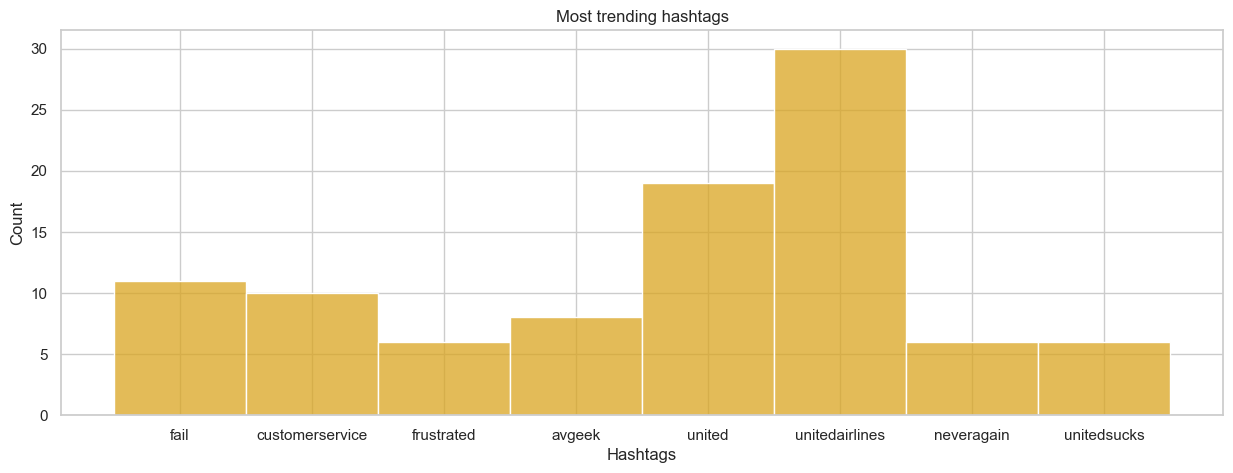

In [43]:
#Plot the data here
sns.set_theme(style="whitegrid", rc={'figure.figsize': (15, 5)})
plot = sns.histplot(x='Hashtag', data=hashtag_name_panda, color='goldenrod')
plot.set_ylabel('Count')
plot.set_xlabel('Hashtags')
plot.set_title('Most trending hashtags')

Text(0.5, 1.0, 'Users used trending hashtags')

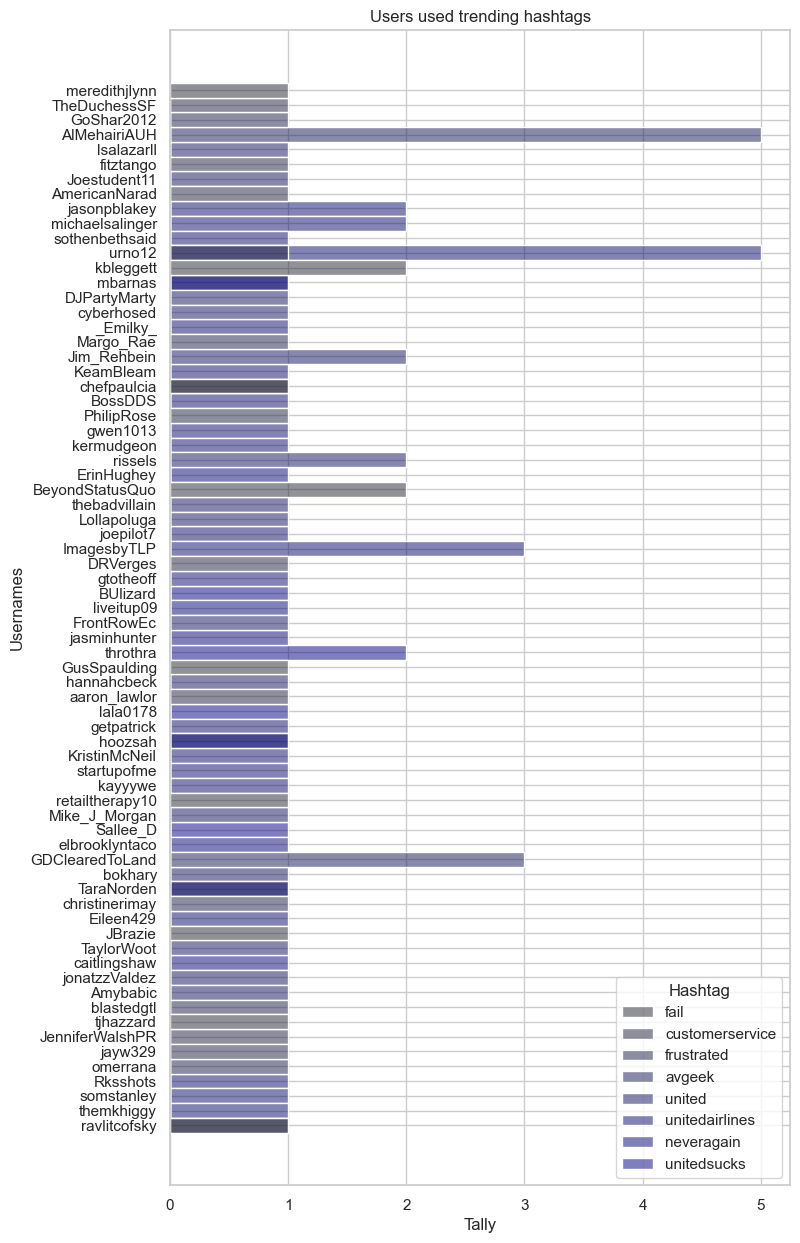

In [44]:
#Plot the data here
sns.set_theme(style="whitegrid", rc={'figure.figsize': (8, 15)})
plot = sns.histplot(y='Name', data=hashtag_name_panda,  hue="Hashtag", palette= "dark:navy")
plot.set_ylabel('Usernames')
plot.set_xlabel('Tally')
plot.set_title('Users used trending hashtags')